In [16]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url="http://peopleanalytics-regression-book.org/data/ugtests.csv"
df=pd.read_csv(url)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Yr1     975 non-null    int64
 1   Yr2     975 non-null    int64
 2   Yr3     975 non-null    int64
 3   Final   975 non-null    int64
dtypes: int64(4)
memory usage: 30.6 KB


In [4]:
df.head()

,Yr1,Yr2,Yr3,Final
0,27,50,52,93
1,70,104,126,207
2,27,36,148,175
3,26,75,115,125
4,46,77,75,114


In [5]:
df.describe()

,Yr1,Yr2,Yr3,Final
count,975.000000,975.000000,975.000000,975.000000
mean,52.145641,92.398974,105.121026,148.962051
std,14.924083,30.038473,33.507052,44.339663
min,3.000000,6.000000,8.000000,8.000000
25%,42.000000,73.000000,81.000000,118.000000
50%,53.000000,94.000000,105.000000,147.000000
75%,62.000000,112.000000,130.000000,175.000000
max,99.000000,188.000000,198.000000,295.000000


In [6]:
df.corr()

,Yr1,Yr2,Yr3,Final
Yr1,1.000000,0.027509,-0.020090,0.020484
Yr2,0.027509,1.000000,0.043435,0.321298
Yr3,-0.020090,0.043435,1.000000,0.666364
Final,0.020484,0.321298,0.666364,1.000000


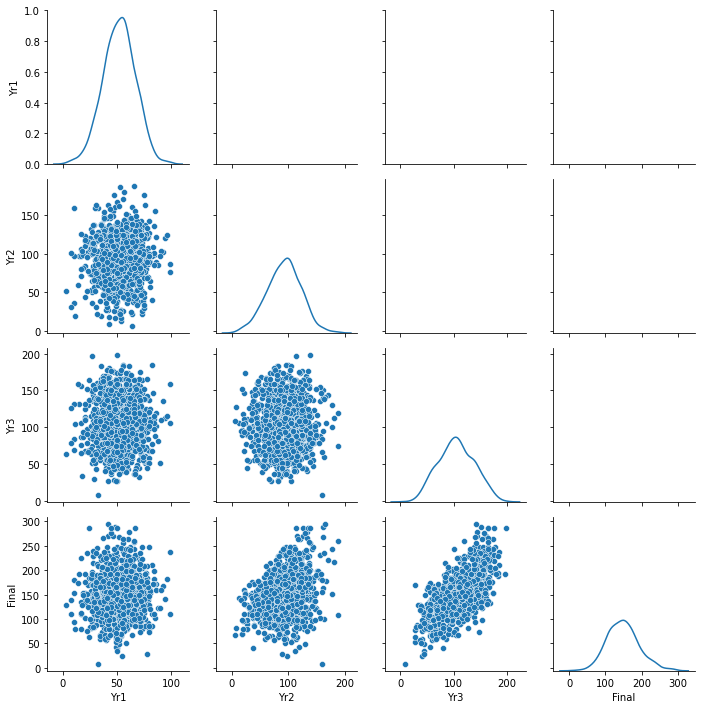

In [7]:
g=sns.PairGrid(df)
g.map_diag(sns.kdeplot)
g.map_lower(sns.scatterplot)

In [8]:
model = sm.OLS.from_formula("Final ~ Yr3", data=df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Final   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     777.1
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          3.52e-126
Time:                        19:39:06   Log-Likelihood:                -4793.9
No. Observations:                 975   AIC:                             9592.
Df Residuals:                     973   BIC:                             9601.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     56.2669      3.490     16.123      0.000      49.418      63.115
Yr3            0.8818      0.032     27.877      0.000       0.820       0.944
==============================================================================
Omnibus:                        3.030   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.220   Jarque-Bera (JB):                2.892
Skew:                           0.111   Prob(JB):                        0.236
Kurtosis:                       3.148   Cond. No.                         363.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
#to predict data pass a dictionary with the column name to
#the predict method ofthe model results
values={'Yr3':[95,125,63]}
result.predict(values)


0    140.037384
1    166.491226
2    111.819954
dtype: float64

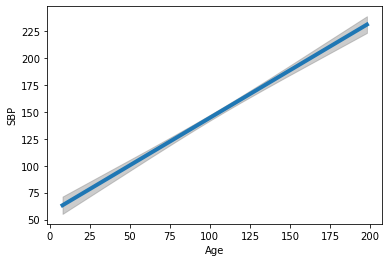

In [18]:
""""In this section we demonstrate some graphing techniques that can be used to gain a better 
understanding of a regression model that has been fit to data.

We start with plots that allow us to visualize the fitted regression function
These plots help to show the estimated role of one variable when the other variables are held fixed
in the values variable

One independent variable that we call the focus variable (which is Yr3 here) is not fixed
"""
from statsmodels.sandbox.predict_functional import predict_functional

# Fix certain variables at reference values.  Not all of these
# variables are used here, but we provide them with a value anyway
# to prevent a warning message from appearing.
values = {"Yr1":1,"Yr2":1}

# The returned values are the predicted values (pr), the confidence bands (cb),
# and the function values (fv) when the reference values are set at specific levels
# it charts the
pr, cb, fv = predict_functional(result, "Yr3",
                values=values, ci_method="simultaneous")

fig,ax=plt.subplots()
ax = sns.lineplot(x=fv, y=pr, lw=4)
ax.fill_between(fv, cb[:, 0], cb[:, 1], color='grey', alpha=0.4)
ax.set_xlabel("Age")
_ = ax.set_ylabel("SBP")

In [55]:
model=sm.OLS.from_formula("Final ~ Yr2 + Yr3 + Yr2*Yr3", data=df)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Final   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     468.9
Date:                Sun, 31 Jan 2021   Prob (F-statistic):          2.91e-188
Time:                        19:52:33   Log-Likelihood:                -4643.5
No. Observations:                 975   AIC:                             9295.
Df Residuals:                     971   BIC:                             9315.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    131.9558     10.207     12.928      0.000     111.925     151.987
Yr2           -0.7947      0.106     -7.528      0.000      -1.002      -0.588
Yr3           -0.2267      0.094     -2.412      0.016      -0.411      -0.042
Yr2:Yr3        0.0117      0.001     12.134      0.000       0.010       0.014
==============================================================================
Omnibus:                        0.692   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.708   Jarque-Bera (JB):                0.764
Skew:                          -0.004   Prob(JB):                        0.682
Kurtosis:                       2.863   Cond. No.                     1.21e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
from statsmodels.sandbox.predict_functional import predict_functional
values={'Yr2':[150,75],
       'Yr3':[75, 150]}



In [57]:
#predict values using the predict method
result.predict(values)


0    127.500956
1    170.104678
dtype: float64

In [54]:
result.params

Intercept    18.087094
Yr2           0.432359
Yr3           0.864959
dtype: float64